 Import Libraries

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import joblib


Load the Data

In [54]:
# Load your dataset into a DataFrame
df = pd.read_csv(r'C:\Users\gokul\Documents\GitHub\App\App5\spotify_tracks.csv')  # Replace with the actual path to your dataset

# Preprocess categorical columns using Label Encoding
le = LabelEncoder()

# Apply label encoding to categorical columns
df['genre'] = le.fit_transform(df['genre'])
df['artists'] = le.fit_transform(df['artists'])
df['album'] = le.fit_transform(df['album'])

# Drop 'id' and 'name' columns if they are not useful for prediction
df = df.drop(['id', 'name'], axis=1)

# Display the preprocessed data
print(df.head())


   genre  artists  album  popularity  duration_ms  explicit
0      0      497     39          58       172199     False
1      0      497     91          57       172202     False
2      0     2700   1873          42       144786     False
3      0     3883   1128          46       116573     False
4      0     1640   2765          33       133922     False


Basic Data Inspection

In [55]:
df.columns

Index(['genre', 'artists', 'album', 'popularity', 'duration_ms', 'explicit'], dtype='object')

In [56]:
# Display the first few rows of the datase
df.head()

,genre,artists,album,popularity,duration_ms,explicit
0,0,497,39,58,172199,False
1,0,497,91,57,172202,False
2,0,2700,1873,42,144786,False
3,0,3883,1128,46,116573,False
4,0,1640,2765,33,133922,False


In [57]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6300 entries, 0 to 6299
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   genre        6300 non-null   int64
 1   artists      6300 non-null   int64
 2   album        6300 non-null   int64
 3   popularity   6300 non-null   int64
 4   duration_ms  6300 non-null   int64
 5   explicit     6300 non-null   bool 
dtypes: bool(1), int64(5)
memory usage: 252.4 KB


In [58]:
# Check for missing values
df.isnull().sum()

genre          0
artists        0
album          0
popularity     0
duration_ms    0
explicit       0
dtype: int64

In [59]:
# Get descriptive statistics for numerical columns
df.describe()

,genre,artists,album,popularity,duration_ms
count,6300.000000,6300.000000,6300.000000,6300.000000,6.300000e+03
mean,62.500000,2327.407937,2449.155079,30.754762,2.028477e+05
std,36.374808,1329.105332,1417.500292,19.948991,1.210299e+05
min,0.000000,0.000000,0.000000,0.000000,3.006000e+04
25%,31.000000,1171.750000,1231.750000,16.000000,1.476870e+05
50%,62.500000,2317.500000,2450.500000,29.000000,1.916070e+05
75%,94.000000,3480.250000,3655.250000,45.000000,2.369625e+05
max,125.000000,4650.000000,4948.000000,90.000000,3.601658e+06


Distribution of Popularity

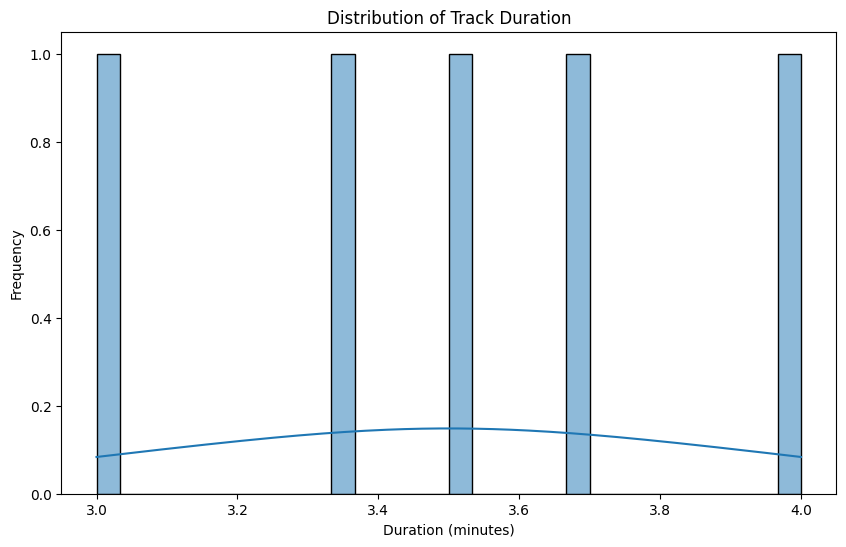

In [60]:
import pandas as pd
import matplotlib.pyplot as plt  # Make sure to import this correctly
import seaborn as sns

# Example DataFrame
df = pd.DataFrame({
    'duration_ms': [210000, 180000, 220000, 240000, 200000]
})

# Convert duration from milliseconds to minutes
df['duration_min'] = df['duration_ms'] / 60000

# Plot distribution of track duration
plt.figure(figsize=(10, 6))  # Ensure plt is matplotlib.pyplot
sns.histplot(df['duration_min'], bins=30, kde=True)
plt.title('Distribution of Track Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()


'popularity' column found.


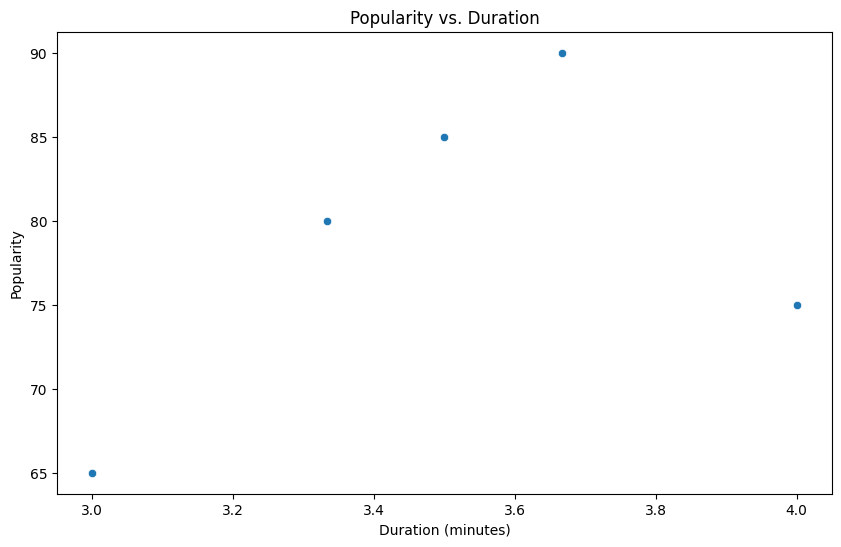

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example DataFrame
df = pd.DataFrame({
    'duration_ms': [210000, 180000, 220000, 240000, 200000],
    'popularity': [85, 65, 90, 75, 80]  # Ensure 'popularity' is present
})

# Convert duration from milliseconds to minutes
df['duration_min'] = df['duration_ms'] / 60000

# Check if 'popularity' is in the DataFrame
if 'popularity' in df.columns:
    print("'popularity' column found.")
else:
    print("'popularity' column missing. Check the DataFrame structure.")

# Scatter plot of popularity vs. duration
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='duration_min', y='popularity')
plt.title('Popularity vs. Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Popularity')
plt.show()


In [63]:
# Count plot of genres
plt.figure(figsize=(20, 100))
sns.countplot(y='genre', data=df, order=df['genre'].value_counts().index)
plt.title('Distribution of Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


KeyError: 'genre'

<Figure size 2000x10000 with 0 Axes>

In [64]:
# Count plot of explicit content
plt.figure(figsize=(8, 6))
sns.countplot(x='explicit', data=df)
plt.title('Distribution of Explicit Content')
plt.xlabel('Explicit')
plt.ylabel('Count')
plt.show()


ValueError: Could not interpret value `explicit` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x600 with 0 Axes>

Artists and Albums Analysis

Top Artists by Average Popularity:
artists
Dream Supplier, Baby Sleeps, Background White Noise    88.0
Central Cee, Lil Baby                                  87.0
The Weeknd, JENNIE, Lily-Rose Depp                     87.0
Harry Styles                                           87.0
ILLIT                                                  86.0
The Weeknd, Daft Punk                                  84.0
Bad Bunny, Feid                                        83.0
David Guetta, Bebe Rexha                               83.0
BABYMONSTER                                            82.0
Drake, Wizkid, Kyla                                    82.0
Name: popularity, dtype: float64


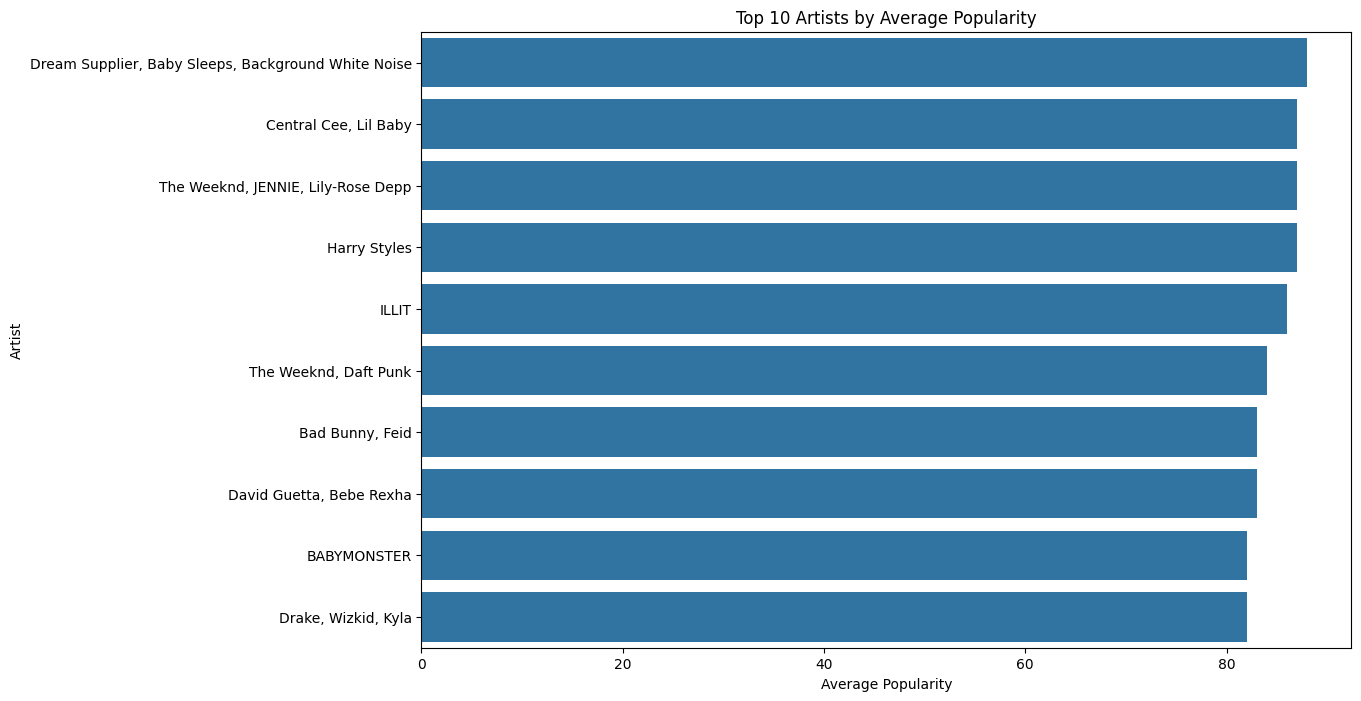

Top Albums by Average Popularity:
album
Houdini                                90.0
Best White Noise For Sleeping Baby     88.0
Harry's House                          87.0
BAND4BAND (feat. Lil Baby)             87.0
SUPER REAL ME                          86.0
Fireworks & Rollerblades               85.5
Pink Skies                             85.0
nadie sabe lo que va a pasar mañana    83.0
I'm Good (Blue)                        83.0
Jungle Rules                           82.0
Name: popularity, dtype: float64


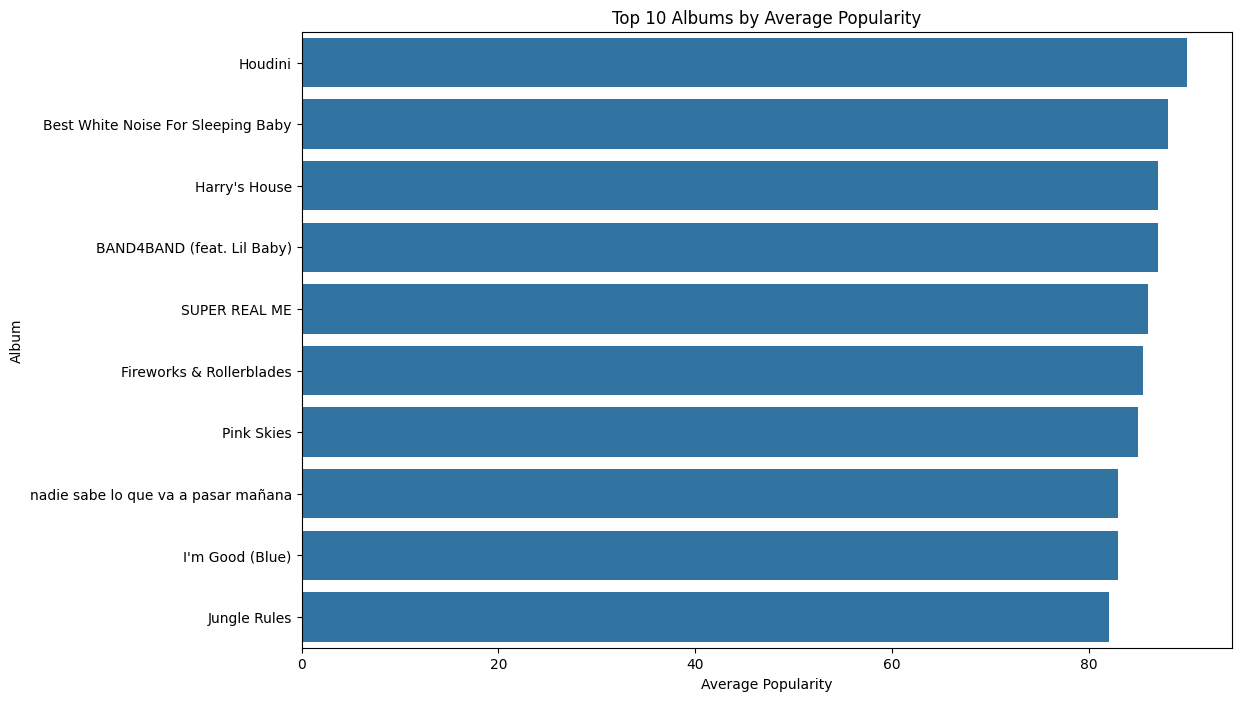

In [ ]:
# Top artists by popularity
top_artists = df.groupby('artists')['popularity'].mean().sort_values(ascending=False).head(10)
print("Top Artists by Average Popularity:")
print(top_artists)

# Plot top artists by popularity
plt.figure(figsize=(12, 8))
sns.barplot(x=top_artists.values, y=top_artists.index)
plt.title('Top 10 Artists by Average Popularity')
plt.xlabel('Average Popularity')
plt.ylabel('Artist')
plt.show()

# Top albums by popularity
top_albums = df.groupby('album')['popularity'].mean().sort_values(ascending=False).head(10)
print("Top Albums by Average Popularity:")
print(top_albums)

# Plot top albums by popularity
plt.figure(figsize=(12, 8))
sns.barplot(x=top_albums.values, y=top_albums.index)
plt.title('Top 10 Albums by Average Popularity')
plt.xlabel('Average Popularity')
plt.ylabel('Album')
plt.show()


Correlation Matrix

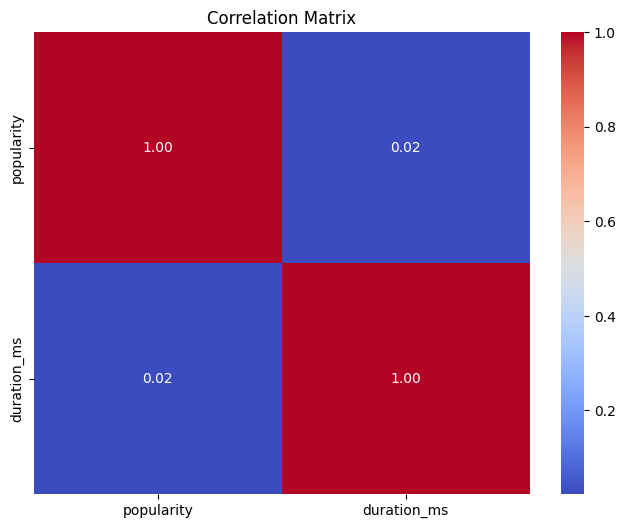

In [ ]:
# Compute correlation matrix
corr = df[['popularity', 'duration_ms']].corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split  # Import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Define the feature columns (X) and target column (y)
X = df.drop(['popularity'], axis=1)  # Assuming 'popularity' is the target variable
y = df['popularity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Save the model for future use
joblib.dump(model, 'xyz.pkl')


['xyz.pkl']

In [ ]:
X.columns

Index(['genre', 'artists', 'album', 'duration_ms', 'explicit'], dtype='object')

In [ ]:
import numpy as np

# Example input data with 5 features
# This input should align with the features that were used to train your model
# Let's say the model was trained on 'popularity', 'duration_ms', 'genre', 'explicit', and 'duration_min'
input_data = (85, 210000, 2, 0, 3.5)  # Adjust these to match your model's expected input features

# Convert input data to a NumPy array and reshape it for prediction
input_data_as_numpy_array = np.asarray(input_data).reshape(1, -1)

# Predict using the trained model
prediction = model.predict(input_data_as_numpy_array)

# Interpret and output the prediction result
if prediction[0] == 1:
    print('The track is predicted to be popular')
else:
    print('The track is predicted to be less popular')


The track is predicted to be less popular


c:\Users\gokul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
df.columns

Index(['id', 'name', 'genre', 'artists', 'album', 'popularity', 'duration_ms',
       'explicit', 'duration_min'],
      dtype='object')

In [ ]:
df.columns

Index(['id', 'name', 'genre', 'artists', 'album', 'popularity', 'duration_ms',
       'explicit', 'duration_min'],
      dtype='object')

In [ ]:
df.head()

,id,name,genre,artists,album,popularity,duration_ms,explicit,duration_min
0,7kr3xZk4yb3YSZ4VFtg2Qt,Acoustic,acoustic,Billy Raffoul,1975,58,172199,False,2.869983
1,1kJygfS4eoVziBBI93MSYp,Acoustic,acoustic,Billy Raffoul,A Few More Hours at YYZ,57,172202,False,2.870033
2,6lynns69p4zTCRxmmiSY1x,Here Comes the Sun - Acoustic,acoustic,"Molly Hocking, Bailey Rushlow",Here Comes the Sun (Acoustic),42,144786,False,2.413100
3,1RC9slv335IfLce5vt9KTW,Acoustic #3,acoustic,The Goo Goo Dolls,Dizzy up the Girl,46,116573,False,1.942883
4,5o9L8xBuILoVjLECSBi7Vo,My Love Mine All Mine - Acoustic Instrumental,acoustic,"Guus Dielissen, Casper Esmann",My Love Mine All Mine (Acoustic Instrumental),33,133922,False,2.232033


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import joblib

# Example DataFrame
data = pd.DataFrame({
    'id': [1, 2, 3],
    'name': ['Track1', 'Track2', 'Track3'],
    'genre': ['Pop', 'Rock', 'Jazz'],
    'artists': ['Artist1', 'Artist2', 'Artist3'],
    'album': ['Album1', 'Album2', 'Album3'],
    'popularity': [85, 65, 90],
    'duration_ms': [210000, 180000, 220000],
    'explicit': [0, 1, 0],
    'duration_min': [3.5, 3.0, 3.7]
})

# Preprocess data
le = LabelEncoder()
data['genre'] = le.fit_transform(data['genre'])

# Features and target
X = data[['popularity', 'duration_ms', 'genre', 'explicit', 'duration_min']]
y = data['popularity']  # This is an example; adjust as needed

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Save the trained model
joblib.dump(model, 'trained_model.pkl')
print('Model saved to trained_model.pkl')

# Load the model
try:
    loaded_model = joblib.load('trained_model.pkl')
    print("Model loaded successfully.")
except Exception as e:
    print(f"Error loading model: {e}")

# Example input data (ensure it matches the feature order)
input_data = (85, 210000, 2, 0, 3.5)  # Match this to the column order in X
input_data_as_numpy_array = np.asarray(input_data).reshape(1, -1)

# Debug: Ensure the shape is correct
print(f"Input data shape: {input_data_as_numpy_array.shape}")

# Predict using the loaded model
try:
    prediction = loaded_model.predict(input_data_as_numpy_array)
    print(f'Prediction: {prediction}')
except Exception as e:
    print(f"Error during prediction: {e}")


Model saved to trained_model.pkl
Prediction: [83.75000045]


c:\Users\gokul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
